## Radioplaylistanalyse mit Pandas

oder **Pandas ohne die lästige Mathematik**




In diesem Notebook wird versucht, mit Pandas die meistgespielten Künstler eines fiktiven Hitsenders zu finden und über diese weitere Informationen herauszufinden.

Es ist Begleitmaterial zu einer Session in Data Science Open Space Berlin am 11.03.2017 und dem Python Barcamp Köln am 08.04.2017 mit nachträglichen Kommentaren / Verbesserungen.

In [1]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Die Beispieldaten *FAKE 2016.txt* sind auf Basis der Playlisten mehrerer marktführender Sender generiert, so im Radio aber nicht gelaufen. Bei der Erzeugung des Testdaten habe ich darauf geachtet, eine möglichst grosse Nähe zu echten Playlisten zu erzeugen. Darüber könnte man einen eigene Session halten...

In [2]:
playlist = pd.read_csv(r'd:\dropbox\pycharmprojects\radio_berlin\data\FAKE 2016.txt', delimiter='|',header=None) 

In [3]:
playlist.columns = ['date time','artist','title']

Zu Kontrollzwecken die Playlist anzeigen

In [4]:
playlist.head()

,date time,artist,title
0,2016-01-01 00:05:24,MAGIC!,RUDE
1,2016-01-01 00:09:06,REA GARVEY,ARMOUR
2,2016-01-01 00:12:22,SHAWN MENDES,STITCHES
3,2016-01-01 00:14:43,ROBIN SCHULZ & J.U.D.G.E.,SHOW ME LOVE
4,2016-01-01 00:18:11,PINK FLOYD,ANOTHER BRICK IN THE WALL (PART II)


Zu Kontrollzwecken die Länge der Playlist anzeigen

In [5]:
len(playlist)

91563

Per *loc* können Elemente angesprochen werden.

In [6]:
playlist.loc[2].title

'STITCHES'

Gruppierung der Künster in der Playlist

In [7]:
topartists = playlist['date time'].groupby([playlist['artist']]).count().rename("Count").reset_index()

Zählen der Künstler

In [8]:
len(topartists)

587

In [9]:
topartists = topartists.sort_values("Count", ascending=False ).reset_index()

Test des Ergebnisses

In [10]:
topartists.head()

,index,artist,Count
0,394,P!NK,1742
1,12,ADELE,1398
2,90,COLDPLAY,1373
3,15,ALAN WALKER,1372
4,143,ELLIE GOULDING,1352


Anzeige der Verteilung der Künstlereinsätze. 

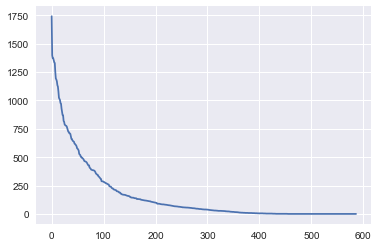

In [11]:
plt.plot(topartists["Count"]);

In [12]:
top20artists = topartists[0:20]

In [13]:
cnt = top20artists["Count"]
art = top20artists["artist"]


Umwandlung in Python-Datentypen

In [14]:
artists = art.tolist()
counts = cnt.tolist()

In [15]:
[x for x in zip(artists,counts)]

[('P!NK', 1742),
 ('ADELE', 1398),
 ('COLDPLAY', 1373),
 ('ALAN WALKER', 1372),
 ('ELLIE GOULDING', 1352),
 ('SHAWN MENDES', 1336),
 ('LOST FREQUENCIES', 1330),
 ('JONAS BLUE', 1250),
 ('DUA LIPA', 1193),
 ('FELIX JAEHN', 1185),
 ('SIA', 1169),
 ('MAX GIESINGER', 1135),
 ('KYGO', 1122),
 ('MILOW', 1079),
 ('MARK FORSTER', 1024),
 ('OLLY MURS', 1013),
 ('REA GARVEY', 1004),
 ('CHARLIE PUTH', 977),
 ('MATT SIMONS', 972),
 ('LOUANE', 929)]

Bar-Diagramm anzeigen, mit den Künstlern als Beschriftung

In [16]:
x = range(len(counts))
y = counts

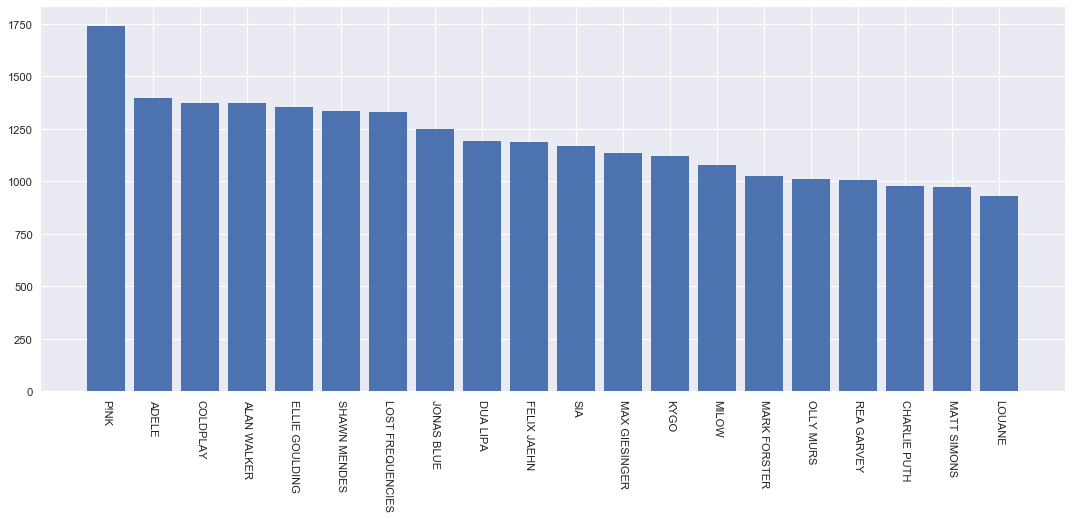

In [17]:
f = plt.figure(figsize=(16, 6), dpi=80)
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(x, y, align='center')
ax.set_xticks(x)
ax.set_xticklabels(artists, rotation=270);


Genauere Untersuchung der zweitplatzierten Adele. (In der Session war sie auf Platz 1, da andere Daten genutzt wurden.)

In [18]:
play_adele = playlist[playlist['artist'] == "ADELE"].groupby(playlist['title']).count()
play_adele = play_adele.sort_values('artist', ascending=False)

In [19]:
play_adele

,date time,artist,title
title,,,
HELLO,495,495,495
WHEN WE WERE YOUNG,333,333,333
SET FIRE TO THE RAIN,181,181,181
SEND MY LOVE (TO YOUR NEW LOVER),138,138,138
WATER UNDER THE BRIDGE,93,93,93
ROLLING IN THE DEEP,79,79,79
SOMEONE LIKE YOU,79,79,79


In [20]:
play_hello = playlist[playlist['artist'] == "ADELE"]

Visualisierung des meistgespielten Titels *Hello*

In [21]:
play_hello = play_hello[play_hello['title'] == "HELLO"]

In [22]:
play_hello["Date"] = pd.to_datetime(play_hello['date time'], format='%Y-%m-%d', errors='ignore').dt.date

In [23]:
play_hello_day = play_hello.groupby(play_hello['Date']).count()

In [24]:
play_hello_day.head()

,date time,artist,title,Date
Date,,,,
2016-01-01,5,5,5,5
2016-01-02,7,7,7,7
2016-01-03,6,6,6,6
2016-01-04,8,8,8,8
2016-01-05,5,5,5,5


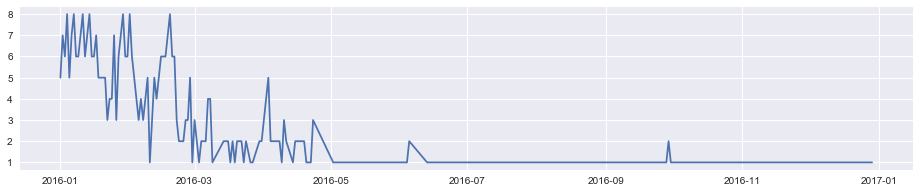

In [25]:
fig = plt.figure(figsize=(16,3))

plt.plot(play_hello_day['artist']);

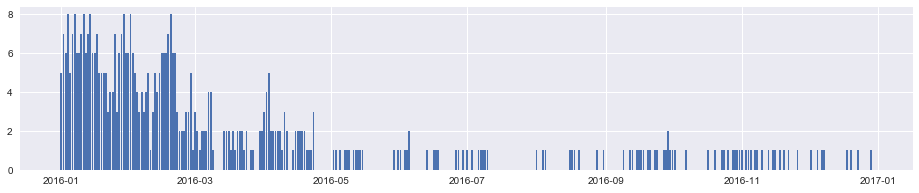

In [26]:
fig = plt.figure(figsize=(16,3))
plt.bar(play_hello_day.index, play_hello_day['artist']);

Dasselbe für den Titel *Rolling in the deep*

In [27]:
play_adele2 = playlist[playlist['artist'] == "ADELE"].copy()
play_adele2 = play_adele2.sort_values('artist', ascending=False)


In [28]:
play_rolling = play_adele2[play_adele2['title'] == "ROLLING IN THE DEEP"].reset_index()


In [29]:
_tmp_Series = pd.to_datetime(play_rolling['date time'], format='%Y-%m-%d', errors='ignore').dt.date
play_rolling["Date"] = _tmp_Series

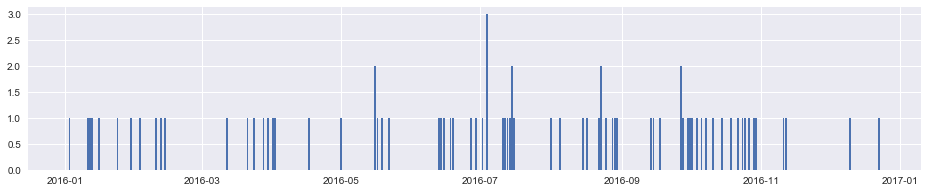

In [30]:
play_rolling_day = play_rolling.groupby(play_rolling['Date']).count()
fig = plt.figure(figsize=(16,3))
plt.bar(play_rolling_day.index, play_rolling_day['artist']);

Kombination beider Titel

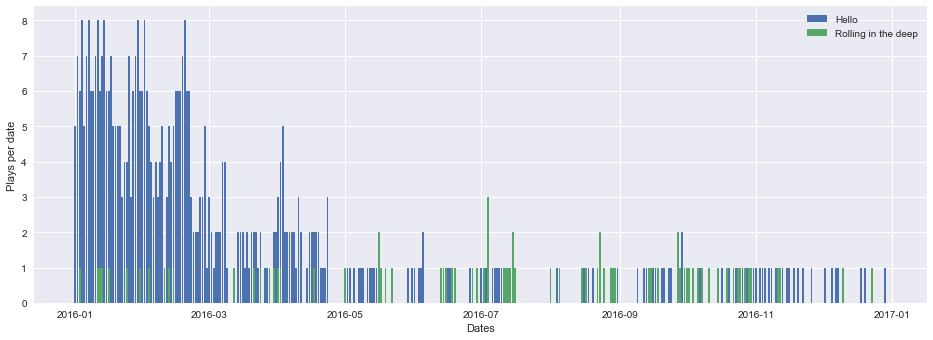

In [31]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(211)
l1 = ax.bar(play_hello_day.index, play_hello_day['artist'])
l2 = ax.bar(play_rolling_day.index, play_rolling_day['artist'])
ax.legend((l1, l2,), ('Hello', 'Rolling in the deep',), loc=0)
plt.xlabel("Dates")
plt.ylabel("Plays per date");

